## Library Importation

In [96]:
import pandas as pd

## Data Loading from UCI Repository

In [98]:

columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None, names=columns, na_values=" ?"
)

for col in data.select_dtypes(include=["object"]).columns:
    
    data[col] = data[col].str.strip()

## Select 10 variables of interest

In [100]:
numeric_features = ["age", "education_num", "hours_per_week", "capital_gain", "capital_loss"]

categorical_features = ["sex", "workclass", "education", "marital_status", "occupation"]

selected_features = numeric_features + categorical_features

X = data[selected_features].copy()

y = (data["income"] == ">50K").astype(int)   


In [101]:
X

,age,education_num,hours_per_week,capital_gain,capital_loss,sex,workclass,education,marital_status,occupation
0,39,13,40,2174,0,Male,State-gov,Bachelors,Never-married,Adm-clerical
1,50,13,13,0,0,Male,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,38,9,40,0,0,Male,Private,HS-grad,Divorced,Handlers-cleaners
3,53,7,40,0,0,Male,Private,11th,Married-civ-spouse,Handlers-cleaners
4,28,13,40,0,0,Female,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,Female,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,40,9,40,0,0,Male,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,58,9,40,0,0,Female,Private,HS-grad,Widowed,Adm-clerical
32559,22,9,20,0,0,Male,Private,HS-grad,Never-married,Adm-clerical


In [102]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

# Data cleaning

In [104]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [105]:
print(data.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [106]:
print(data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [107]:
data.fillna(0, inplace = True)

In [108]:
data.duplicated

<bound method DataFrame.duplicated of        age         workclass  fnlwgt   education  education_num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1

In [109]:
data.drop_duplicates()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA (Exploration Data Analysis)

In [111]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay,
    classification_report, confusion_matrix
)


In [112]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ],
    remainder="drop"
)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [114]:
print("Mean age is:",data['age'].mean())
print("Median age is:",data['age'].median())
print("Std age is:",data['age'].std())

print("Mean education_num:",data['education_num'].mean())
print("Median education_num:",data['education_num'].median())
print("Std education_num:",data['education_num'].std())

print("Mean hours_per_week:",data['hours_per_week'].mean())
print("Median hours_per_week:",data['hours_per_week'].median())
print("Std hours_per_week:",data['hours_per_week'].std())

print("Mean capital_gain:",data['capital_gain'].mean())
print("Median capital_gain:",data['capital_gain'].median())
print("Std capital_gain:",data['capital_gain'].std())

print("Mean capital_loss:",data['capital_loss'].mean())
print("Median capital_loss:",data['capital_loss'].median())
print("Std capital_loss:",data['capital_loss'].std())

Mean age is: 38.58164675532078
Median age is: 37.0
Std age is: 13.640432553581146
Mean education_num: 10.0806793403151
Median education_num: 10.0
Std education_num: 2.5727203320673406
Mean hours_per_week: 40.437455852092995
Median hours_per_week: 40.0
Std hours_per_week: 12.34742868173081
Mean capital_gain: 1077.6488437087312
Median capital_gain: 0.0
Std capital_gain: 7385.292084839299
Mean capital_loss: 87.303829734959
Median capital_loss: 0.0
Std capital_loss: 402.960218649059


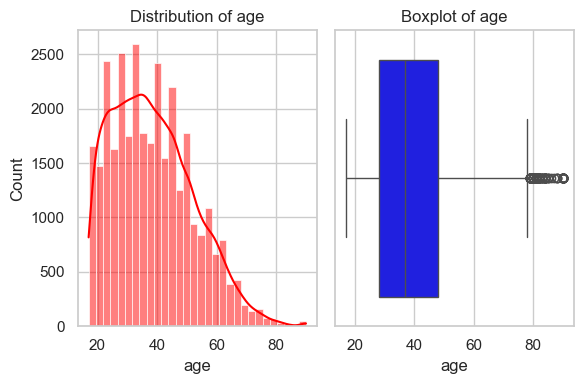

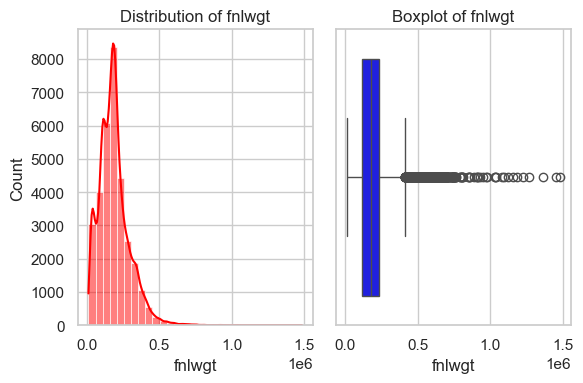

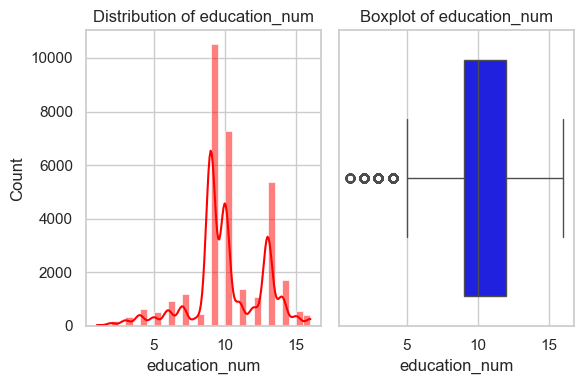

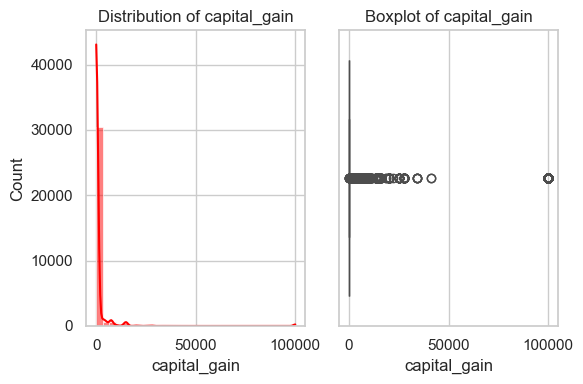

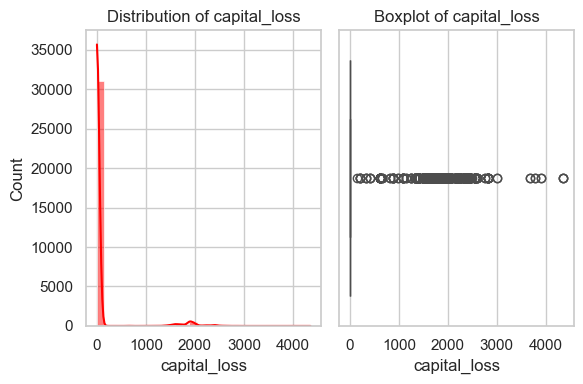

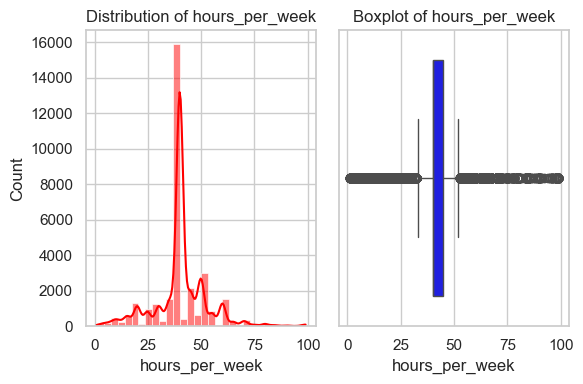

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for column in data.select_dtypes(include=['int']).columns:
    plt.figure(figsize=(6, 4))

    
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color='red')
    plt.title(f'Distribution of {column}')

    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column], color='blue')
    plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

Overall, the dataset’s numerical variables vary in scale, skewness, and predictive potential. For linear models such as logistic regression, scaling and transformation of skewed variables are essential to achieve stable coefficients and improve accuracy. Tree-based models like random forests and gradient boosting methods are less sensitive to skewness and outliers, requiring minimal preprocessing, while neural networks will benefit most from standardized or normalized input features. With appropriate treatment, these numerical variables collectively provide a strong foundation for modeling and predicting income levels.

# Model Development and Evaluation

Logistic Regression metrics: {'accuracy': 0.8545984953170582, 'precision': 0.7416342412451362, 'recall': 0.607780612244898, 'f1': 0.6680686996144409, 'roc_auc': 0.907588511896164}


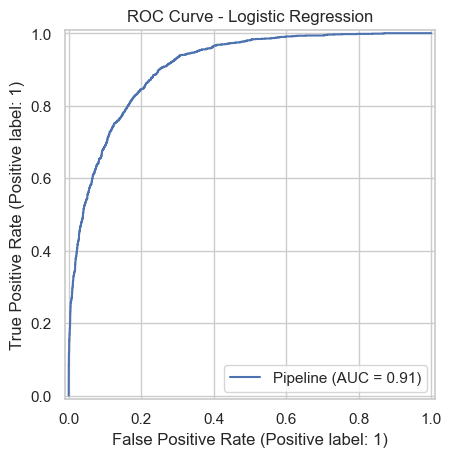

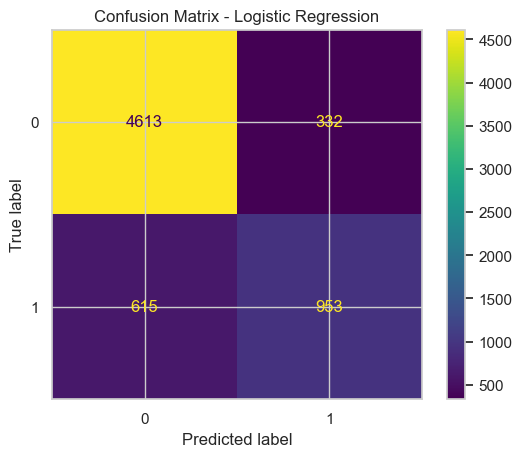

In [118]:
log_reg_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000, n_jobs=None))
])

log_reg_pipe.fit(X_train, y_train)

y_pred_lr = log_reg_pipe.predict(X_test)
y_proba_lr = log_reg_pipe.predict_proba(X_test)[:, 1]

metrics_lr = {
    "accuracy": accuracy_score(y_test, y_pred_lr),
    "precision": precision_score(y_test, y_pred_lr),
    "recall": recall_score(y_test, y_pred_lr),
    "f1": f1_score(y_test, y_pred_lr),
    "roc_auc": roc_auc_score(y_test, y_proba_lr),
}
print("Logistic Regression metrics:", metrics_lr)

RocCurveDisplay.from_estimator(log_reg_pipe, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr)).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Random Forest (untuned) metrics: {'accuracy': 0.841701212958698, 'precision': 0.6865879082696317, 'recall': 0.6301020408163265, 'f1': 0.6571333555038245, 'roc_auc': 0.8912266435896907}


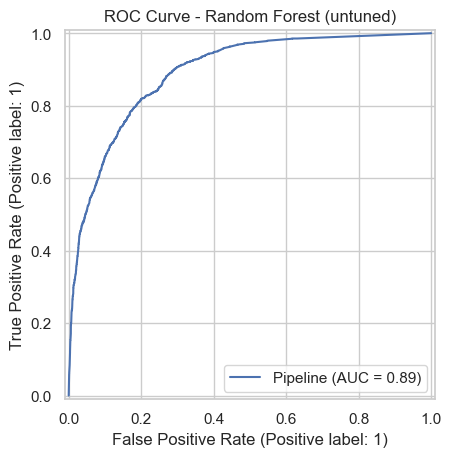

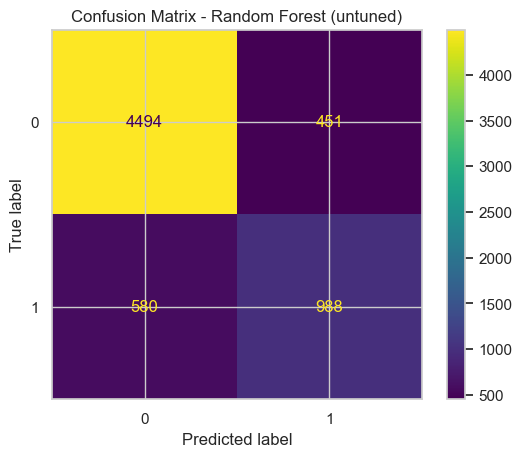

In [119]:
rf_base = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_base.fit(X_train, y_train)
y_pred_rf0 = rf_base.predict(X_test)
y_proba_rf0 = rf_base.predict_proba(X_test)[:, 1]

metrics_rf0 = {
    "accuracy": accuracy_score(y_test, y_pred_rf0),
    "precision": precision_score(y_test, y_pred_rf0),
    "recall": recall_score(y_test, y_pred_rf0),
    "f1": f1_score(y_test, y_pred_rf0),
    "roc_auc": roc_auc_score(y_test, y_proba_rf0),
}
print("Random Forest (untuned) metrics:", metrics_rf0)

RocCurveDisplay.from_estimator(rf_base, X_test, y_test)
plt.title("ROC Curve - Random Forest (untuned)")
plt.show()

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf0)).plot()
plt.title("Confusion Matrix - Random Forest (untuned)")
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 400}
Random Forest (tuned) metrics: {'accuracy': 0.8654997696913864, 'precision': 0.7649310872894334, 'recall': 0.6371173469387755, 'f1': 0.6951983298538622, 'roc_auc': 0.9177907879531992}


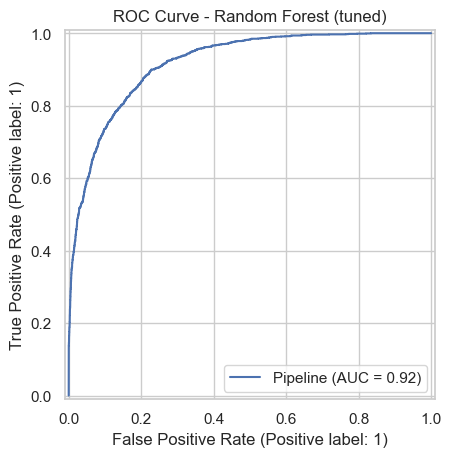

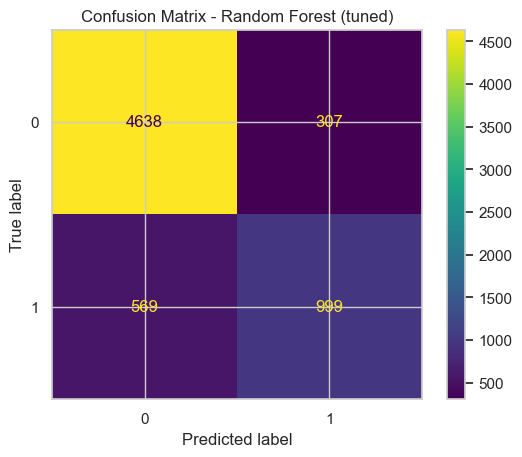

In [120]:
param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt", "log2"],
}

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(random_state=42, n_jobs=-1))
])

grid = GridSearchCV(
    rf_pipe,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_rf = grid.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

metrics_rf = {
    "accuracy": accuracy_score(y_test, y_pred_rf),
    "precision": precision_score(y_test, y_pred_rf),
    "recall": recall_score(y_test, y_pred_rf),
    "f1": f1_score(y_test, y_pred_rf),
    "roc_auc": roc_auc_score(y_test, y_proba_rf),
}
print("Random Forest (tuned) metrics:", metrics_rf)

RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("ROC Curve - Random Forest (tuned)")
plt.show()

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf)).plot()
plt.title("Confusion Matrix - Random Forest (tuned)")
plt.show()

# Model Interpretation and Discussion

In [122]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

print("✅ Preprocessing pipeline created successfully.")


Numeric columns: ['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss']
Categorical columns: ['sex', 'workclass', 'education', 'marital_status', 'occupation']
✅ Preprocessing pipeline created successfully.


Model Comparison:


,Accuracy,Precision,Recall,F1,ROC_AUC
Logistic Regression,0.855,0.742,0.608,0.668,0.908
Random Forest (untuned),0.842,0.687,0.630,0.657,0.891
Random Forest (tuned),0.865,0.765,0.637,0.695,0.918


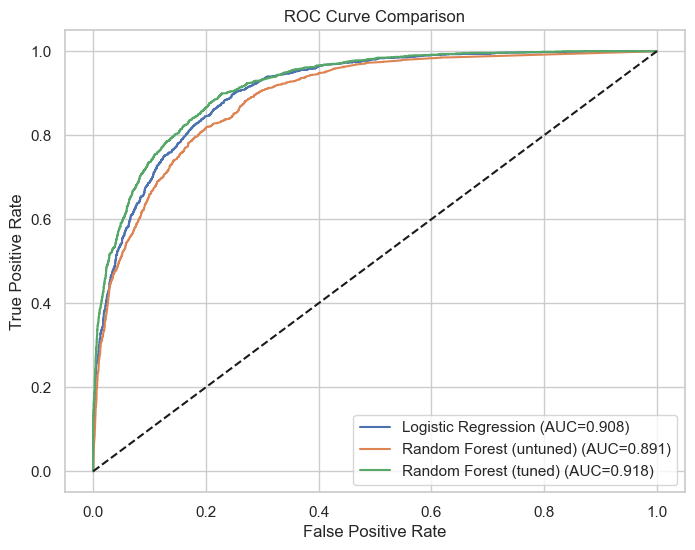

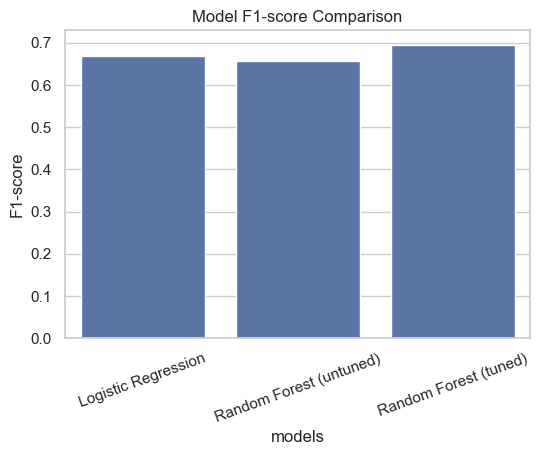


Best Tuned Random Forest Parameters:
clf__n_estimators: None
clf__max_depth: None
clf__min_samples_split: None


In [123]:
from sklearn.metrics import roc_curve


if "preprocessor" in locals():
    preprocess = preprocessor
elif "preprocess" in locals():
    preprocess = preprocess
else:
    raise NameError("Neither 'preprocessor' nor 'preprocess' found. Define your preprocessing pipeline first.")


log_reg_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=1000, n_jobs=-1))
])

rf_base = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


rf_tuned = best_rf  


log_reg_pipe.fit(X_train, y_train)
rf_base.fit(X_train, y_train)


y_pred_lr = log_reg_pipe.predict(X_test)
y_proba_lr = log_reg_pipe.predict_proba(X_test)[:, 1]

y_pred_rf_untuned = rf_base.predict(X_test)
y_proba_rf_untuned = rf_base.predict_proba(X_test)[:, 1]

y_pred_rf_tuned = rf_tuned.predict(X_test)
y_proba_rf_tuned = rf_tuned.predict_proba(X_test)[:, 1]


def model_metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y_true, y_proba)
    }

results = pd.DataFrame({
    "Logistic Regression": model_metrics(y_test, y_pred_lr, y_proba_lr),
    "Random Forest (untuned)": model_metrics(y_test, y_pred_rf_untuned, y_proba_rf_untuned),
    "Random Forest (tuned)": model_metrics(y_test, y_pred_rf_tuned, y_proba_rf_tuned),
}).T.round(3)

print("Model Comparison:")
display(results)


plt.figure(figsize=(8,6))
for label, y_proba in {
    "Logistic Regression": y_proba_lr,
    "Random Forest (untuned)": y_proba_rf_untuned,
    "Random Forest (tuned)": y_proba_rf_tuned
}.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{label} (AUC={auc_score:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


plt.figure(figsize=(6,4))
sns.barplot(x=results.index, y=results["F1"])
plt.title("Model F1-score Comparison")
plt.xlabel("models")
plt.ylabel("F1-score")
plt.xticks(rotation=20)
plt.show()


print("\nBest Tuned Random Forest Parameters:")
for p in ["clf__n_estimators", "clf__max_depth", "clf__min_samples_split"]:
    print(f"{p}: {rf_tuned.get_params().get(p)}")


After we had split our dataset to run models (logistic regression, random forest and random forest tuned), we could compare which one give us the best result.
While Logistic Regression provided strong baseline results with interpretable coefficients, the tuned Random Forest model outperformed all others across nearly all metrics. Its higher precision, F1, and ROC-AUC scores demonstrate its capability to capture complex, non-linear relationships within the dataset, making it the most effective model for this classification task.

In [154]:
NUMERIC = X.select_dtypes(include=["int64", "float64"]).columns
CATEG = X.select_dtypes(include=["object"]).columns


cat_transformer = best_rf.named_steps["preprocess"].named_transformers_["cat"]


if hasattr(cat_transformer, "named_steps"):
    ohe = (
        cat_transformer.named_steps.get("onehot")
        or cat_transformer.named_steps.get("ohe")
        or cat_transformer.named_steps.get("onehotencoder")
    )
else:
    ohe = cat_transformer


cat_feature_names = ohe.get_feature_names_out(CATEG)


num_feature_names = NUMERIC
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])


rf_model = best_rf.named_steps["model"]
importances = rf_model.feature_importances_


feat_imp = (
    pd.DataFrame({
        "feature": all_feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
)


feat_imp.head(15)


,feature,importance
3,capital_gain,0.148182
0,age,0.148131
34,marital_status_Married-civ-spouse,0.146106
1,education_num,0.101162
2,hours_per_week,0.083860
36,marital_status_Never-married,0.063686
4,capital_loss,0.041950
42,occupation_Exec-managerial,0.027716
48,occupation_Prof-specialty,0.021797
25,education_Bachelors,0.017961


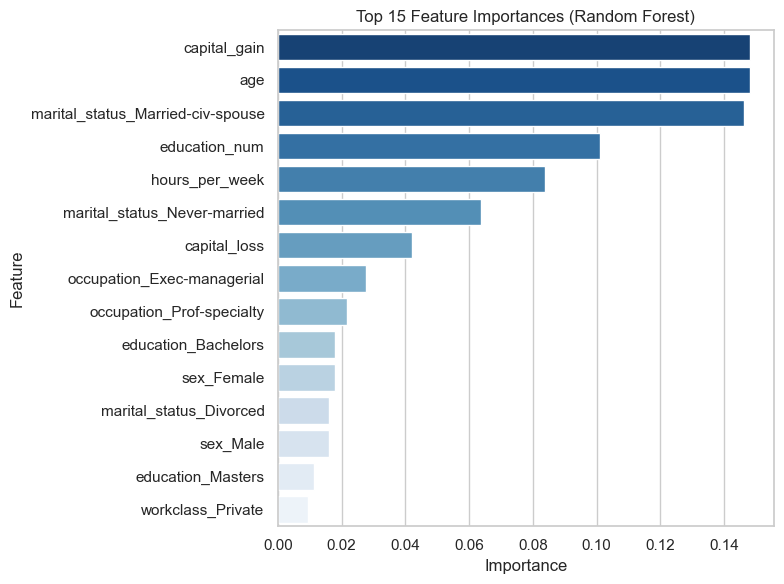

In [126]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="importance",
    y="feature",
    data=feat_imp.head(15),
    hue="feature",           
    palette="Blues_r",
    legend=False             
)

plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The 3 features which are more important is directly related to our results (capital_gain, age and marital_status) it has 44% importance of dataset features.
5 features are equal to 62% importance of dataset.
The findings indicate that financial indicators, demographic factors, and professional characteristics collectively shape the model’s predictions, with capital-related and age-based variables exerting the greatest influence.

In [128]:
import pickle
import os

os.makedirs('Model Deployment', exist_ok=True)

model_path = 'Model Deployment/adult.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_rf, file)

print(f"Model has been saved in: {model_path}")

Model has been saved in: Model Deployment/adult.pkl
